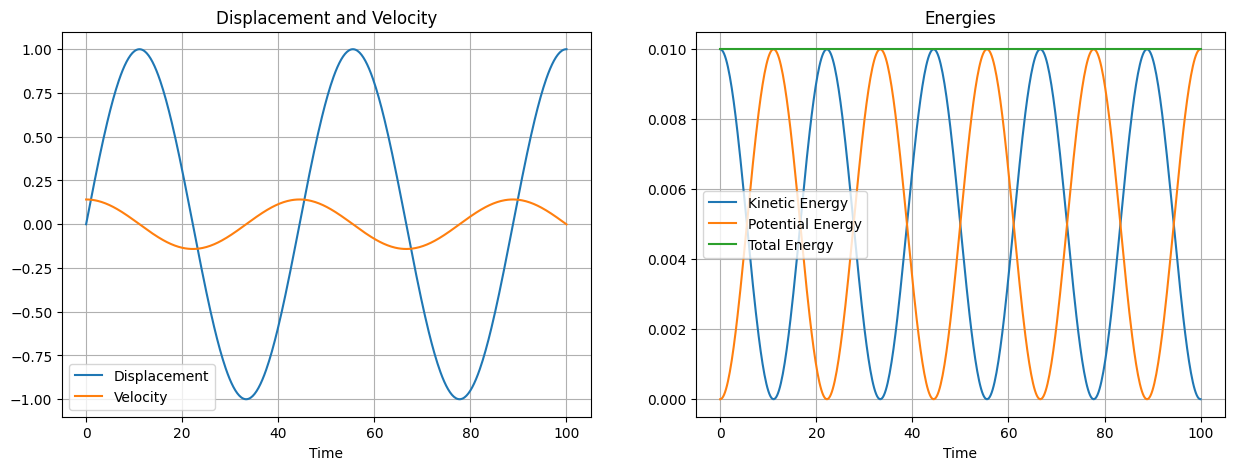

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Inputs
m = 1.0
c = 0.0
k = 0.02
F_0 = 0.0
ω = 0.0
u_0 = 0
u_dot_0 = 1.0

ω_n = np.sqrt(k/m) # natural Frequency
c_critical = 2 * np.sqrt(m * k)  # Critical Damping
xi = c/c_critical # Damping Ratio
ω_d = ω_n * np.sqrt(1 - xi**2)  # Damped Frequency
r = ω / ω_n  # Frequency Ratio
u_static = F_0 / k  # Static Displacement
Rd = 1 / np.sqrt((1 - r**2)**2 + (2 * r * xi)**2)  # Damped Response
theta = np.arctan((2 * r * xi) / (1 - r**2))  # Phase Difference
A = u_0 + Rd * u_static * np.sin(theta)
B = u_dot_0 - Rd * u_static * ω * np.cos(theta) + A * ω * xi

# Generating time array
t = np.linspace(0, 100, 500)

# Displacement and Velocity Functions
u = np.exp(-xi * ω_n * t) * (A * np.cos(ω_d * t) + B * np.sin(ω_d * t)) + Rd * u_static * np.sin(ω*t - theta)
u_dot = np.exp(-xi * ω_n * t) * ((B * ω_d - xi * ω_n * A) * np.cos(ω_d * t) + (-A * ω_d - xi * ω_n * B) * np.sin(ω_d * t)) + Rd * u_static * ω * np.cos(ω*t - theta)

# Energy Functions
KE = 0.5 * m * u_dot**2
PE = 0.5 * k * u**2
TE = KE + PE

# Plotting Displacement and Velocity
fig, ax = plt.subplots(1, 2, figsize=(15,5))
ax[0].plot(t, u, label="Displacement")
ax[0].plot(t, u_dot, label="Velocity")
ax[0].set_xlabel('Time')
ax[0].set_title('Displacement and Velocity')
ax[0].grid(True)
ax[0].legend()

# Plotting Energies
ax[1].plot(t, KE, label="Kinetic Energy")
ax[1].plot(t, PE, label="Potential Energy")
ax[1].plot(t, TE, label="Total Energy")
ax[1].set_xlabel('Time')
ax[1].set_title('Energies')
ax[1].grid(True)
ax[1].legend()

plt.show()